In [1]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install openpyxl

In [3]:
import psycopg2
import pandas as pd
import psycopg2.extras
import psycopg2

In [41]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "123456",
                                           host = "127.0.0.1",
                                           port = "5433")

    def getConnection(self):
        print("successfully connected to database")
        return self.connection

In [42]:
con = PostgresConnection().getConnection()

successfully connected to database


In [6]:
cur = con.cursor()
select_stmt = "SELECT t.payment_key , t.trans_type, t.bank_name " \
              "FROM ecomdb_star_schema.trans_dim t"
cur.execute(select_stmt)
records = cur.fetchall()
records

[('P001', 'cash', 'None'),
 ('P002', 'card', 'AB Bank Limited'),
 ('P003', 'card', 'Bangladesh Commerce Bank Limited'),
 ('P004', 'card', 'Bank Asia Limited'),
 ('P005', 'card', 'BRAC Bank Limited'),
 ('P006', 'card', 'Citizens Bank Limited'),
 ('P007', 'card', 'City Bank Limited'),
 ('P008', 'card', 'Community Bank Bangladesh Limited'),
 ('P009', 'card', 'Dhaka Bank Limited'),
 ('P010', 'card', 'Dutch-Bangla Bank Limited'),
 ('P011', 'card', 'Eastern Bank Limited'),
 ('P012', 'card', 'IFIC Bank Limited'),
 ('P013', 'card', 'Jamuna Bank Limited'),
 ('P014', 'card', 'Meghna Bank Limited'),
 ('P015', 'card', 'Mercantile Bank Limited'),
 ('P016', 'card', 'Midland Bank Limited'),
 ('P017', 'card', 'Modhumoti Bank Limited'),
 ('P018', 'card', 'Mutual Trust Bank Limited'),
 ('P019', 'card', 'National Bank Limited'),
 ('P020', 'card', 'National Credit & Commerce Bank Limited'),
 ('P021', 'card', 'NRB Bank Limited'),
 ('P022', 'card', 'NRB Commercial Bank Ltd'),
 ('P023', 'card', 'NRB Global B

In [7]:
trans_df = pd.DataFrame(list(records), columns=['payment_key', 'trans_type', 'bank_name'])
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   payment_key  39 non-null     object
 1   trans_type   39 non-null     object
 2   bank_name    39 non-null     object
dtypes: object(3)
memory usage: 1.0+ KB


### Simple queries

In [8]:
cur = con.cursor()
select_query = "select s.division , sum(f.total_price)\
                from ecomdb.fact_table f \
                join ecomdb.store_dim s on s.store_key = f.store_key \
                group by (s.division)\
                order by s.division"
cur.execute(select_query)
records = cur.fetchall()
records

[('BARISAL', Decimal('7520343.75')),
 ('CHITTAGONG', Decimal('19763595.00')),
 ('DHAKA', Decimal('40764619.75')),
 ('KHULNA', Decimal('11311610.50')),
 ('RAJSHAHI', Decimal('12099196.00')),
 ('RANGPUR', Decimal('8429836.50')),
 ('SYLHET', Decimal('5512234.25'))]

In [9]:
query_1 = pd.DataFrame(list(records),columns = ['division','total_price'])
query_1.head()
# query_1['total_price'] = query_1['total_price'].astype('Int64')
query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   division     7 non-null      object
 1   total_price  7 non-null      object
dtypes: object(2)
memory usage: 240.0+ bytes


In [10]:
query_1.head()

,division,total_price
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00


In [11]:
query_1['total_price'] = query_1['total_price'].astype(int)
query_1.head()

,division,total_price
0,BARISAL,7520343
1,CHITTAGONG,19763595
2,DHAKA,40764619
3,KHULNA,11311610
4,RAJSHAHI,12099196


In [12]:
import matplotlib.pyplot as plt
import numpy as np


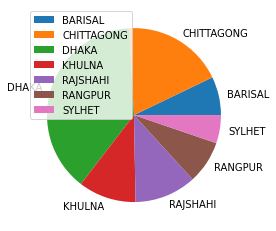

In [13]:
plt.pie(query_1.total_price, labels = query_1.division)
# plt.pie(query_1.total_price,query_1.division)
plt.legend()
plt.show() 

In [14]:
cur = con.cursor()
select_query = "select c.name , sum(f.total_price)\
                from ecomdb.fact_table f \
                join ecomdb.coustomer_dim c on c.coustomer_key = f.coustomer_key \
                group by (c.name)"
cur.execute(select_query)
records = cur.fetchall()
records

[('maina devi', Decimal('13636.50')),
 ('pratibha devi', Decimal('12703.25')),
 ('tumpa mundal', Decimal('14591.00')),
 ('mohit maan', Decimal('11591.00')),
 ('suman devi', Decimal('21477.75')),
 ('vinod lal', Decimal('10491.00')),
 ('rajinder kaur', Decimal('10767.75')),
 ('smt shiya', Decimal('12024.75')),
 ('sujanti', Decimal('9944.00')),
 ('partima', Decimal('33390.50')),
 ('labbhi', Decimal('11553.25')),
 ('amarjit kaur with a child keshav', Decimal('12527.25')),
 ('nikil mishra', Decimal('11684.75')),
 ('prem bai', Decimal('12873.75')),
 ('poneem', Decimal('24555.75')),
 ('sazi', Decimal('10968.50')),
 ('rozi sharma', Decimal('9240.00')),
 ('phoolmani', Decimal('10045.25')),
 ('rishab', Decimal('11160.00')),
 ('smt. neelam', Decimal('13669.25')),
 ('payal kanvar', Decimal('11588.25')),
 ('kumari shilpa', Decimal('10500.50')),
 ('laxmi deve', Decimal('11816.50')),
 ('hailena', Decimal('11818.00')),
 ('jyotsana @ jyoti', Decimal('20798.00')),
 ('kalpeshwari devi', Decimal('12977.00

In [15]:
query_2 = pd.DataFrame(list(records),columns = ['Customer_name','total_price'])
query_2.head()

,Customer_name,total_price
0,maina devi,13636.50
1,pratibha devi,12703.25
2,tumpa mundal,14591.00
3,mohit maan,11591.00
4,suman devi,21477.75


In [16]:
# plt.bar(query_2.Customer_name,query_2.total_price)

In [17]:
cur = con.cursor()
select_query = "select s.division , sum(f.total_price)\
                from ecomdb.fact_table f \
                join ecomdb.store_dim s on s.store_key = f.store_key \
                where s.division = 'BARISAL'\
                group by (s.division)"
cur.execute(select_query)
records = cur.fetchall()
records

[('BARISAL', Decimal('7520343.75'))]

In [18]:
query_3 = pd.DataFrame(list(records),columns=['district','total_sales'])
query_3.head()

,district,total_sales
0,BARISAL,7520343.75


In [19]:
# plt.bar(query_3.district , query_3.total_sales)

In [20]:
cur = con.cursor()
select_query = "select  t.year, sum(f.total_price) \
                from ecomdb.fact_table f \
                join ecomdb.time_dim t on f.time_key=t.time_key \
                where t.year=2015 \
                group by t.year"
cur.execute(select_query)
records = cur.fetchall()
records


[(Decimal('2015'), Decimal('15095720.25'))]

In [21]:
query_4 = pd.DataFrame(list(records),columns = ['year','total_sales'])
query_4.head()

,year,total_sales
0,2015,15095720.25


In [22]:
cur = con.cursor()
select_query = "select  s.division , t.year, sum(f.total_price) \
                from ecomdb.fact_table f \
                join ecomdb.time_dim t on f.time_key=t.time_key \
                join ecomdb.store_dim s on s.store_key = f.store_key \
                where t.year=2015  and s.division = 'BARISAL' \
                group by (t.year,s.division)"
cur.execute(select_query)
records = cur.fetchall()
records


[('BARISAL', Decimal('2015'), Decimal('1076902.75'))]

In [23]:
query_5 = pd.DataFrame(list(records),columns = ['districs','year','totale_sales'])
query_5.head()

,districs,year,totale_sales
0,BARISAL,2015,1076902.75


### Complex level #########

In [24]:
cur = con.cursor()
select_query = "select  i.supplier,i.item_name,  sum(f.quantity) \
                from ecomdb.fact_table f\
                join ecomdb.item_dim i on f.item_key=i.item_key \
                group by (i.supplier,i.item_name,f.quantity) \
                order by (i.supplier,f.quantity) desc "
cur.execute(select_query)
records = cur.fetchall()
records


[('NINGBO SEDUNO IMP & EXP CO.LTD', 'Napkins Square Lunch', 3619),
 ('NINGBO SEDUNO IMP & EXP CO.LTD',
  'Perrier Flavors Sparkling Water 16.9oz',
  3971),
 ('NINGBO SEDUNO IMP & EXP CO.LTD', 'M&M Peanut Butter 1.6 oz', 3762),
 ('NINGBO SEDUNO IMP & EXP CO.LTD', "Hefty Cmprtmnt Plates Foam 10'", 3674),
 ('NINGBO SEDUNO IMP & EXP CO.LTD', 'Truvia Natural Sweetener', 3894),
 ('NINGBO SEDUNO IMP & EXP CO.LTD', 'Extra Variety Packs Sugar Free', 3718),
 ('NINGBO SEDUNO IMP & EXP CO.LTD', 'M&M Variety Full Size Bags', 3707),
 ('NINGBO SEDUNO IMP & EXP CO.LTD', 'Cheese and Peanut Butter Crackers', 3696),
 ('NINGBO SEDUNO IMP & EXP CO.LTD', "Welch's 100% Juice Variety10 oz", 3806),
 ('NINGBO SEDUNO IMP & EXP CO.LTD', 'Sugar in the Raw Packets', 3850),
 ('NINGBO SEDUNO IMP & EXP CO.LTD',
  'Gatorade X-Factor Fierce Variety 20 oz',
  3751),
 ('NINGBO SEDUNO IMP & EXP CO.LTD', 'Gatorade Frost Variety 20 oz ', 3289),
 ('NINGBO SEDUNO IMP & EXP CO.LTD', "Cheetos Flamin' Hot 1 oz", 3696),
 ('NINGBO 

In [25]:
query_6 = pd.DataFrame(list(records),columns = ['supplier','item_name','quantity'])
query_6.head()

,supplier,item_name,quantity
0,NINGBO SEDUNO IMP & EXP CO.LTD,Napkins Square Lunch,3619
1,NINGBO SEDUNO IMP & EXP CO.LTD,Perrier Flavors Sparkling Water 16.9oz,3971
2,NINGBO SEDUNO IMP & EXP CO.LTD,M&M Peanut Butter 1.6 oz,3762
3,NINGBO SEDUNO IMP & EXP CO.LTD,Hefty Cmprtmnt Plates Foam 10',3674
4,NINGBO SEDUNO IMP & EXP CO.LTD,Truvia Natural Sweetener,3894


In [26]:
query_6 = query_6.set_index('item_name').groupby("supplier")['quantity'].nlargest(3).reset_index()
query_6

,supplier,item_name,quantity
0,BIGSO AB,Kind Bars Variety Pack 1.4 oz,4191
1,BIGSO AB,La Croix Sparkling Cran-Raspberry 12 oz,4125
2,BIGSO AB,"Dawn Ultra Dish Detergent, Original Scent",4114
3,Bolsius Boxmeer,Diet Coke - 12 oz cans,4422
4,Bolsius Boxmeer,Reese's Pieces Peanutbutter Candy,4081
5,Bolsius Boxmeer,Pure Leaf Sweet Tea 8.5oz,4026
6,"CHERRY GROUP CO.,LTD",Wonderful Pistachios (in shell),4004
7,"CHERRY GROUP CO.,LTD",Stirrers Coffee Stirs 7inch,3960
8,"CHERRY GROUP CO.,LTD",Tejava Unsweetened Black Tea 16.9oz,3905
9,CHROMADURLIN S.A.S,Planters Nut Variety Packs,4114


In [74]:
x = input('enter a number : ')

enter a number : 400


In [75]:
cur = con.cursor()
# select_query = 
m_1 = "select  i.item_name,\
                tr.trans_type,\
                t.date\
                from ecomdb.fact_table f\
                join ecomdb.item_dim i on f.item_key=i.item_key\
                join ecomdb.trans_dim tr on tr.payment_key = f.payment_key\
                join ecomdb.time_dim t on t.time_key = f.time_key\
                where tr.trans_type = 'card' and t.date > now() - interval ' "
m_2 = x+"  day'  "
# group by cube(i.item_name,tr.trans_type,t.date) "
# -- order by (i.item_name) desc "
cur.execute(m_1+m_2)
records = cur.fetchall()
records


[('K Cups - McCafe Premium Roast',
  'card',
  datetime.datetime(2021, 1, 20, 7, 25)),
 ('Kind  Bars Variety Pack 1.4 oz ',
  'card',
  datetime.datetime(2021, 1, 19, 19, 23)),
 ('Ocean Spray Cranberry Juice Cocktail 15oz ',
  'card',
  datetime.datetime(2021, 1, 19, 19, 23)),
 ('Coffee-mate Original Powdered Creamer',
  'card',
  datetime.datetime(2021, 1, 19, 17, 26)),
 ('Perrier Sparkling Water plastic 16.9oz',
  'card',
  datetime.datetime(2021, 1, 19, 7, 49)),
 ('Lysol Disinfectant Spray 19 oz',
  'card',
  datetime.datetime(2021, 1, 19, 7, 49)),
 ('Gatorade Variety 20 oz ', 'card', datetime.datetime(2021, 1, 21, 5, 1)),
 ('Diet Gingerale 12 oz cans', 'card', datetime.datetime(2021, 1, 17, 20, 54)),
 ('Planters Nut-trition 1.5 oz ',
  'card',
  datetime.datetime(2021, 1, 23, 1, 12)),
 ('Cheese and Peanut Butter Crackers',
  'card',
  datetime.datetime(2021, 1, 23, 1, 12)),
 ('Gardettos Snacks', 'card', datetime.datetime(2021, 1, 22, 12, 38)),
 ('Spunkmeyer Muffin Variety', 'card',

In [31]:
query_7 = pd.DataFrame(list(records),columns = ['item_name','trans_type','date'])
query_7

,item_name,trans_type,date
0,Monster Java 15 oz,card,2020-12-05 14:03:00
1,Ozarka Spring Water Mini 8oz,card,2020-11-08 01:27:00
2,Peanutbutter Filled Pretzels,card,2020-07-31 14:41:00
3,Tejava Unsweetened Black Tea 16.9oz,card,2019-10-08 10:58:00
4,Sugar in the Raw Packets,card,2020-04-07 14:08:00
...,...,...,...
176755,Swiss Miss Hot Cocoa Mix 1 oz,card,2021-01-12 01:46:00
176756,Perrier Flavors Sparkling Water 16.9oz,card,2019-11-29 14:01:00
176757,Foam Coffee Cups - 12 ounce,card,2020-12-18 22:09:00
176758,Pepsi - 12 oz cans,card,2020-10-21 20:01:00


### Worst season ########

In [32]:
cur = con.cursor()
select_query = "select i.item_name, \
                t.quarter,  \
                sum(f.quantity) \
                from ecomdb.fact_table f \
                join ecomdb.item_dim i on i.item_key = f.item_key \
                join ecomdb.time_dim t on t.time_key = f.time_key \
                group by (i.item_name , t.quarter ) \
                order by (i.item_name)"
# group by cube(i.item_name,tr.trans_type,t.date) "
# -- order by (i.item_name) desc "
cur.execute(select_query)
records = cur.fetchall()
records



[('100% Juice Box Variety 6.75 oz ', 'Q1', 5698),
 ('100% Juice Box Variety 6.75 oz ', 'Q2', 5876),
 ('100% Juice Box Variety 6.75 oz ', 'Q3', 6045),
 ('100% Juice Box Variety 6.75 oz ', 'Q4', 5806),
 ('A&W Root Beer - 12 oz cans', 'Q1', 5965),
 ('A&W Root Beer - 12 oz cans', 'Q2', 5735),
 ('A&W Root Beer - 12 oz cans', 'Q3', 6103),
 ('A&W Root Beer - 12 oz cans', 'Q4', 5820),
 ('A&W Root Beer Diet - 12 oz cans', 'Q1', 6026),
 ('A&W Root Beer Diet - 12 oz cans', 'Q2', 5627),
 ('A&W Root Beer Diet - 12 oz cans', 'Q3', 5940),
 ('A&W Root Beer Diet - 12 oz cans', 'Q4', 5589),
 ('Advil 2 pill packets', 'Q1', 5453),
 ('Advil 2 pill packets', 'Q2', 6001),
 ('Advil 2 pill packets', 'Q3', 5647),
 ('Advil 2 pill packets', 'Q4', 6025),
 ('All Purpose Cleaner 409 Spray', 'Q1', 5325),
 ('All Purpose Cleaner 409 Spray', 'Q2', 5375),
 ('All Purpose Cleaner 409 Spray', 'Q3', 5764),
 ('All Purpose Cleaner 409 Spray', 'Q4', 5890),
 ('Altoids Small Packs Variety', 'Q1', 5730),
 ('Altoids Small Packs Var

In [33]:
query_8 = pd.DataFrame(list(records),columns = ['item_name','quarter','quantity'])
query_8

,item_name,quarter,quantity
0,100% Juice Box Variety 6.75 oz,Q1,5698
1,100% Juice Box Variety 6.75 oz,Q2,5876
2,100% Juice Box Variety 6.75 oz,Q3,6045
3,100% Juice Box Variety 6.75 oz,Q4,5806
4,A&W Root Beer - 12 oz cans,Q1,5965
...,...,...,...
1031,Yoplait Original Yogurt Variety Pack,Q4,5737
1032,Zoo Animal Cookies/Crackers,Q1,5462
1033,Zoo Animal Cookies/Crackers,Q2,5508
1034,Zoo Animal Cookies/Crackers,Q3,5701


In [34]:
query_8 = query_8.set_index('quarter').groupby("item_name")['quantity'].nsmallest(1).reset_index()
query_8

,item_name,quarter,quantity
0,100% Juice Box Variety 6.75 oz,Q1,5698
1,A&W Root Beer - 12 oz cans,Q2,5735
2,A&W Root Beer Diet - 12 oz cans,Q4,5589
3,Advil 2 pill packets,Q1,5453
4,All Purpose Cleaner 409 Spray,Q1,5325
...,...,...,...
254,Welch's 100% Juice Variety10 oz,Q2,5494
255,Wint O Green LifeSavers Sugar Free,Q1,5323
256,Wonderful Pistachios (in shell),Q1,5578
257,Yoplait Original Yogurt Variety Pack,Q1,5426


In [45]:
# cur = con.cursor()
# select_query = '''select i.item_name, s.division, sum(f.total_price) 
#                 "from ecomdb.fact_table f 
#                 "join ecomdb.item_dim i on i.item_key = f.item_key 
#                 "join ecomdb.store_dim s on s.store_key = f.store_key 
#                 "group by (s.division,i.item_name) 
#                 "order by (s.division)'''
# cur.execute(select_query)
# records = cur.fetchall()
# records


In [58]:
cur = con.cursor()
select_query = '''select   
                s.store_key,
                t.month,
                avg(f.total_price) 
                from ecomdb.fact_table f
                join ecomdb.time_dim t on t.time_key = f.time_key 
                join ecomdb.store_dim s on s.store_key = f.store_key 
                group by cube (s.store_key,t.month)    
                order by (s.store_key)'''
cur.execute(select_query)
records = cur.fetchall()
records

[('S0001', Decimal('1'), Decimal('97.7543103448275862')),
 ('S0001', Decimal('6'), Decimal('101.2459349593495935')),
 ('S0001', Decimal('12'), Decimal('107.8697478991596639')),
 ('S0001', Decimal('9'), Decimal('96.1901041666666667')),
 ('S0001', Decimal('10'), Decimal('104.6166666666666667')),
 ('S0001', Decimal('3'), Decimal('109.4158878504672897')),
 ('S0001', Decimal('7'), Decimal('103.9189189189189189')),
 ('S0001', Decimal('11'), Decimal('103.8355855855855856')),
 ('S0001', Decimal('4'), Decimal('98.8805309734513274')),
 ('S0001', Decimal('5'), Decimal('99.5245535714285714')),
 ('S0001', Decimal('8'), Decimal('105.1269531250000000')),
 ('S0001', None, Decimal('102.5407569141193595')),
 ('S0001', Decimal('2'), Decimal('100.5776699029126214')),
 ('S0002', Decimal('9'), Decimal('104.7039473684210526')),
 ('S0002', Decimal('3'), Decimal('102.7565217391304348')),
 ('S0002', Decimal('6'), Decimal('100.9268867924528302')),
 ('S0002', Decimal('11'), Decimal('93.4549180327868852')),
 ('S00

In [59]:
query_10 = pd.DataFrame(list(records),columns = ['store_key','month','avg sales'])
query_10

,store_key,month,avg sales
0,S0001,1,97.7543103448275862
1,S0001,6,101.2459349593495935
2,S0001,12,107.8697478991596639
3,S0001,9,96.1901041666666667
4,S0001,10,104.6166666666666667
...,...,...,...
9446,None,2,105.5077818723537714
9447,None,12,105.6896222951285665
9448,None,4,105.0876045669661061
9449,None,11,105.9146828059985602


In [56]:
query_10